<a href="https://colab.research.google.com/github/rajhazarika85/python/blob/main/Pandas_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

### Show version

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
pd.__version__

'1.1.5'

In [ ]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.10.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.109+
Version          : #1 SMP Tue Apr 20 19:55:43 PDT 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.5
numpy            : 1.19.5
pytz             : 2018.9
dateutil         : 2.8.1
pip              : 19.3.1
setuptools       : 56.1.0
Cython           : 0.29.23
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.5
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1

### Create exampel dataframe

In [ ]:
df = pd.DataFrame({'C1':[100,200], 'C2':[300,400]})
df

,C1,C2
0,100,300
1,200,400


In [ ]:
pd.DataFrame(np.random.rand(3,2)) # row , column

,0,1
0,0.289991,0.745091
1,0.857279,0.134387
2,0.946456,0.247823


In [ ]:
pd.DataFrame(np.random.rand(3,2), columns=list('ab'))

,a,b
0,0.741228,0.151205
1,0.077353,0.862648
2,0.429824,0.260294


### Rename columns


In [ ]:
df = df.rename({'C1':'Col1'}, axis='columns')
df

,Col1,C2
0,100,300
1,200,400


In [ ]:
df.columns = ['C1','C2']
df

,C1,C2
0,100,300
1,200,400


In [ ]:
df.columns = df.columns.str.replace('1','_')
df

,C_,C2
0,100,300
1,200,400


In [ ]:
df.add_prefix('X_')
df

,C_,C2
0,100,300
1,200,400


In [ ]:
df.add_suffix('X_')
df

,C_,C2
0,100,300
1,200,400


### Load data from sklearn

In [ ]:
iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### Reverse row order

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/aegorenkov/f7f0f8d6e9cc17ca9774572e224e2ad1/raw/9429430ee053bc796d694ed7e88b333a54f3e287/drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
df.loc[::-1].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
192,Zimbabwe,64,18,4,4.7,AF
191,Zambia,32,19,4,2.5,AF
190,Yemen,6,0,0,0.1,AS
189,Vietnam,111,2,1,2.0,AS
188,Venezuela,333,100,3,7.7,SA


In [ ]:
df.loc[::-1].reset_index(drop=True).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Zimbabwe,64,18,4,4.7,AF
1,Zambia,32,19,4,2.5,AF
2,Yemen,6,0,0,0.1,AS
3,Vietnam,111,2,1,2.0,AS
4,Venezuela,333,100,3,7.7,SA


### Reverse column order

In [ ]:
df.loc[:,::-1].head()

,continent,total_litres_of_pure_alcohol,wine_servings,spirit_servings,beer_servings,country
0,AS,0.0,0,0,0,Afghanistan
1,EU,4.9,54,132,89,Albania
2,AF,0.7,14,0,25,Algeria
3,EU,12.4,312,138,245,Andorra
4,AF,5.9,45,57,217,Angola


### Select columns by datatype

In [ ]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [ ]:
df.select_dtypes(include='number').head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


In [ ]:
df.select_dtypes(include='object').head()

,country,continent
0,Afghanistan,AS
1,Albania,EU
2,Algeria,AF
3,Andorra,EU
4,Angola,AF


In [ ]:
df.select_dtypes(include='category').head()

""
0
1
2
3
4


In [ ]:
df.select_dtypes(exclude='number').head()

,country,continent
0,Afghanistan,AS
1,Albania,EU
2,Algeria,AF
3,Andorra,EU
4,Angola,AF


### Convert strings to number

In [ ]:
dictn ={'C1':[1.1,2.2,3.3, np.nan]}
df = pd.DataFrame(dictn)
df

,C1
0,1.1
1,2.2
2,3.3
3,NaN


In [ ]:
df.dtypes

C1    float64
dtype: object

In [ ]:
df.astype({'C1':'float'}).dtypes

C1    float64
dtype: object

In [ ]:
pd.to_numeric(df.C1, errors='coerce')

0    1.1
1    2.2
2    3.3
3    NaN
Name: C1, dtype: float64

In [ ]:
pd.to_numeric(df.C1, errors='coerce').fillna(0)

0    1.1
1    2.2
2    3.3
3    0.0
Name: C1, dtype: float64

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
df

,C1
0,1.1
1,2.2
2,3.3
3,0.0


In [ ]:
df.dtypes

C1    float64
dtype: object

### Reduce DataFrame size

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/aegorenkov/f7f0f8d6e9cc17ca9774572e224e2ad1/raw/9429430ee053bc796d694ed7e88b333a54f3e287/drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 29.0 KB


In [ ]:
cols = ['beer_servings','country']
small_drinks = pd.read_csv('https://gist.githubusercontent.com/aegorenkov/f7f0f8d6e9cc17ca9774572e224e2ad1/raw/9429430ee053bc796d694ed7e88b333a54f3e287/drinks.csv', usecols=cols)
small_drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        193 non-null    object
 1   beer_servings  193 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.9 KB


In [ ]:
# Convert contegory 
dtypes = {'country':'category'}
small_drinks = pd.read_csv('https://gist.githubusercontent.com/aegorenkov/f7f0f8d6e9cc17ca9774572e224e2ad1/raw/9429430ee053bc796d694ed7e88b333a54f3e287/drinks.csv', 
                           usecols=cols,
                           dtype=dtypes)
small_drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   country        193 non-null    category
 1   beer_servings  193 non-null    int64   
dtypes: category(1), int64(1)
memory usage: 19.3 KB


### Build DataFrame from multiple files (row wise)

In [ ]:
from glob import glob

stock_files = sorted(glob('stocks*.csv'))
pd.concat(pd.read_csv(file) for file in stock_files)
pd.concat(pd.read_csv(file) for file in stock_files, ignore_index=True)


### Build DataFrame from multiple files (Column wise)

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/aegorenkov/f7f0f8d6e9cc17ca9774572e224e2ad1/raw/9429430ee053bc796d694ed7e88b333a54f3e287/drinks.csv')
df.head()
df1 = df[['country','beer_servings']]
df2 = df[['spirit_servings','wine_servings']]

In [ ]:
stock_files = sorted(glob('stocks*.csv'))
pd.concat(pd.read_csv(file) for file in stock_files, axis='columns')


### Split into random datasets

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/aegorenkov/f7f0f8d6e9cc17ca9774572e224e2ad1/raw/9429430ee053bc796d694ed7e88b333a54f3e287/drinks.csv')
df.head()

df1 = df.sample(frac=0.75, random_state=50)
df2 = df.drop(df1.index)

In [ ]:
len(df1) + len(df2)

### Filter dataframe into multiple categories

In [ ]:
df[
   (df.country =='Algeria') |
   (df.country =='Angola')
]


In [ ]:
df[df.country.isin(['Algeria','Angola'])].head()

In [ ]:
# Reverse
df[~df.country.isin(['Algeria','Angola'])].head()

### Filter DF by largest categories

In [ ]:
movie = pd.read_csv('https://raw.githubusercontent.com/Srashti13/Movie-Data-set/master/Moviedf_full2.csv')
movie.head()

,Rank,Movie.Name,Studio.Name,Total.Gross.Earning.million.,Theater,Earning.Opening.Day.million.,Year,Rated,Genre,Runtime,Director,ImdB.names.used
0,1,Black Panther,BV,700059566,4084,700059566,2018,PG-13,"Action, Adventure, Sci-Fi",134 min,Ryan Coogler,Black Panther
1,2,Avengers: Infinity War,BV,678815482,4474,678815482,2018,PG-13,"Action, Adventure, Fantasy, Sci-Fi",149 min,"Anthony Russo, Joe Russo",Avengers: Infinity War
2,3,Incredibles 2,BV,608563044,4410,608563044,2018,PG,"Animation, Action, Adventure, Comedy, Family, ...",118 min,Brad Bird,Incredibles 2
3,4,Jurassic World: Fallen Kingdom,Uni.,416769345,4485,416769345,2018,PG-13,"Action, Adventure, Sci-Fi",128 min,J.A. Bayona,Jurassic World: Fallen Kingdom
4,5,Deadpool 2,Fox,318491426,4349,318491426,2018,R,"Action, Adventure, Comedy, Sci-Fi",119 min,David Leitch,Deadpool 2


In [ ]:
counts = movie['Studio.Name'].value_counts() 
counts.nlargest(3)

WB      225
Uni.    223
Fox     205
Name: Studio.Name, dtype: int64

In [ ]:
movie[movie['Studio.Name'].isin(counts.nlargest(3).index)].head()

,Rank,Movie.Name,Studio.Name,Total.Gross.Earning.million.,Theater,Earning.Opening.Day.million.,Year,Rated,Genre,Runtime,Director,ImdB.names.used
3,4,Jurassic World: Fallen Kingdom,Uni.,416769345,4485,416769345,2018,PG-13,"Action, Adventure, Sci-Fi",128 min,J.A. Bayona,Jurassic World: Fallen Kingdom
4,5,Deadpool 2,Fox,318491426,4349,318491426,2018,R,"Action, Adventure, Comedy, Sci-Fi",119 min,David Leitch,Deadpool 2
9,10,Dr. Seuss' The Grinch,Uni.,211619175,4141,211619175,2018,NaN,"Animation, Comedy, Family, Fantasy",86 min,NaN,The Grinch
10,11,A Star is Born,WB,195278597,3904,195278597,2018,R,"Drama, Music, Romance",136 min,Bradley Cooper,A Star is Born
12,13,Crazy Rich Asians,WB,173962956,3865,173962956,2018,PG-13,"Comedy, Romance",120 min,Jon M. Chu,Crazy Rich Asians


### Handle missing values

In [ ]:
df.isna().sum()

In [ ]:
df.isna().mean()

In [ ]:
df.dropna(axis='columns')

#### Drop columns where 10% of the data are missing

In [ ]:
df.dropna(thresh=len(df) * 0.9, axis='columns')

### Split string into multiple columns

In [ ]:
df.name.str.split(',', expand=True)

#### Split string and keep one columns

In [ ]:
df = pd.DataFrame({'city':['LA, CA']})
df['city2'] = df.city.str.split(',',expand=True)[0] 
df

,city,city2
0,"LA, CA",LA


### Expand a series of lists into a dataframe

In [ ]:
df = pd.DataFrame({'C1':['a','b'],'C2':[[10,20],[20,30]]})
df

,C1,C2
0,a,"[10, 20]"
1,b,"[20, 30]"


In [ ]:
df_new = df.C2.apply(pd.Series)
df_new

,0,1
0,10,20
1,20,30


In [ ]:
pd.concat([df, df_new], axis='columns')

,C1,C2,0,1
0,a,"[10, 20]",10,20
1,b,"[20, 30]",20,30


### Aggregate by multiple functions

In [ ]:
 nba = pd.read_csv('https://raw.githubusercontent.com/sivabalanb/Data-Analysis-with-Pandas-and-Python/master/nba.csv')
 nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [ ]:
nba.groupby('Team').Salary.agg(['sum', 'count']).head()

,sum,count
Team,,
Atlanta Hawks,72902950.0,15
Boston Celtics,58541068.0,14
Brooklyn Nets,52528475.0,15
Charlotte Hornets,78340920.0,15
Chicago Bulls,86783378.0,15


### Combine the output of aggragation with dataframe

In [ ]:
nba.groupby('Team').Salary.sum().head()

Team
Atlanta Hawks        72902950.0
Boston Celtics       58541068.0
Brooklyn Nets        52528475.0
Charlotte Hornets    78340920.0
Chicago Bulls        86783378.0
Name: Salary, dtype: float64

#### Transform is used to aggregate each row

In [ ]:
total_salary = nba.groupby('Team').Salary.transform('sum')


0      58541068.0
1      58541068.0
2      58541068.0
3      58541068.0
4      58541068.0
          ...    
453    63060091.0
454    63060091.0
455    63060091.0
456    63060091.0
457           NaN
Name: Salary, Length: 458, dtype: float64

In [ ]:
nba['TotalSalary'] = total_salary
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,TotalSalary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,58541068.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,58541068.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,58541068.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,58541068.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0,58541068.0


### Select the slice of rows and columns

In [ ]:
nba.describe().loc['min':'25%','Number':'Weight']

,Number,Age,Weight
min,0.0,19.0,161.0
25%,5.0,24.0,200.0


### Reshape multiindexed series

In [ ]:
nba.groupby(['Team','College']).Salary.mean()

Team                College             
Atlanta Hawks       Bucknell                  947276.0
                    Creighton                5746479.0
                    Florida                 12000000.0
                    Kansas                   2854940.0
                    Louisiana Tech          18671659.0
                                               ...    
Washington Wizards  LSU                       650601.0
                    Michigan State           4000000.0
                    Nevada                   2170465.0
                    North Carolina State      273038.0
                    Virginia Tech             561716.0
Name: Salary, Length: 336, dtype: float64

In [ ]:
nba.groupby(['Team','College']).Salary.mean().unstack()

### Create a pivot table

In [ ]:
nba.pivot_table(index='College', columns='Team', values='Salary', aggfunc='mean', margins=True)

Team,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,Houston Rockets,Indiana Pacers,Los Angeles Clippers,Los Angeles Lakers,Memphis Grizzlies,Miami Heat,Milwaukee Bucks,Minnesota Timberwolves,New Orleans Pelicans,New York Knicks,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards,All
College,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,2.100000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.450590e+05,NaN,NaN,NaN,1320000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.421686e+06
Arizona,NaN,NaN,1.335480e+06,NaN,NaN,4.570152e+06,NaN,NaN,2841960.0,1.171046e+07,9.472760e+05,2.679440e+06,NaN,NaN,NaN,NaN,3.000000e+06,NaN,NaN,4.000000e+06,NaN,4171680.0,5.250930e+05,2.061920e+05,NaN,NaN,NaN,NaN,NaN,NaN,3.325948e+06
Arizona State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.575644e+07,NaN,1.114440e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.933941e+06
Arkansas,NaN,NaN,NaN,NaN,1.391160e+06,NaN,NaN,NaN,NaN,NaN,6.486486e+06,NaN,NaN,NaN,NaN,261894.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.713180e+06
Baylor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.813480e+05,NaN,NaN,NaN,NaN,9.813480e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wichita State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.450590e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.450590e+05
Wisconsin,NaN,NaN,NaN,2.612520e+06,NaN,NaN,4.053446e+06,NaN,NaN,NaN,1.646400e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.035000e+06,NaN,5.250930e+05,NaN,NaN,NaN,NaN,1.974492e+06
Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.155600e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.155600e+06


### Convert continous data into categorical data

In [ ]:
nba.head()

# Age into categorical

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,TotalSalary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,58541068.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,58541068.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,58541068.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,58541068.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0,58541068.0


In [ ]:
pd.cut(nba.Age, bins=[0,20,30,50], labels=['A','B','C'])

0        B
1        B
2        B
3        B
4        B
      ... 
453      B
454      B
455      B
456      B
457    NaN
Name: Age, Length: 458, dtype: category
Categories (3, object): ['A' < 'B' < 'C']

### Change display option two decimal places

In [ ]:
# Standard display 2 decimal #
pd.set_option('display.float_format','{:.2f}'.format)
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,TotalSalary
0,Avery Bradley,Boston Celtics,0.00,PG,25.00,6-2,180.00,Texas,7730337.00,58541068.00
1,Jae Crowder,Boston Celtics,99.00,SF,25.00,6-6,235.00,Marquette,6796117.00,58541068.00
2,John Holland,Boston Celtics,30.00,SG,27.00,6-5,205.00,Boston University,nan,58541068.00
3,R.J. Hunter,Boston Celtics,28.00,SG,22.00,6-5,185.00,Georgia State,1148640.00,58541068.00
4,Jonas Jerebko,Boston Celtics,8.00,PF,29.00,6-10,231.00,NaN,5000000.00,58541068.00


### Style a dataframe

In [ ]:
format_dict = {'Date':'{:%m/%d/%y}','close':'${:.2f}','volume':'{:,}'}
df.style.format(format_dict)


#### highlight high low

In [ ]:
(
    df.style.format(format_dict)
    .hide_index()
    .highlight_min('salary', color='red')
    .highlight_max('salary', color='lightgreen')
    
)
 

#### Color mapping

In [ ]:
(
    df.style.format(format_dict)
    .hide_index()
    .background_gradient(subset='Volumne', cmap='Blues')
    
)
 

#### Bar chart in cells

In [ ]:
(
    df.style.format(format_dict)
    .hide_index()
    .bar('volumee', color='lightblue', align = 'zero')
    .set_caption('Raj')
)
 

### Profile a dataframe

In [ ]:
import pandas_profiling

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/amberkakkar01/Titanic-Survival-Prediction/master/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [ ]:
pandas_profiling.ProfileReport(titanic)

# List

### Replace

In [ ]:
list1 =[10,20,30,5.7]
list1[2]=3.7
list1

[10, 20, 3.7, 5.7]

### insert

In [ ]:
list1.insert(2,'HELLO')
list1

[10, 20, 'HELLO', 3.7, 5.7]

### Sort

In [ ]:
list1.sort()

TypeError: ignored

In [ ]:
list2 =[10,20,30,5.7]
list2.sort()
list2

[5.7, 10, 20, 30]

In [ ]:
animal = ['a','c','b']
animal.sort()
animal

['a', 'b', 'c']

In [ ]:
animal.sort(reverse=True)
animal

['c', 'b', 'a']

### Delete

In [ ]:
del animal[1]
animal

['a', 'c']

### reverse

In [ ]:
animal = ['a','c','b']
animal.reverse()
animal

['b', 'c', 'a']

### filter

In [ ]:
# list of letters
letters = ['a', 'b', 'd', 'e', 'i', 'j', 'o']

# function that filters vowels
def filter_vowels(letter):
    vowels = ['a', 'e', 'i', 'o', 'u']

    if(letter in vowels):
        return True
    else:
        return False

filtered_vowels = filter(filter_vowels, letters)

print('The filtered vowels are:')
for vowel in filtered_vowels:
    print(vowel)

The filtered vowels are:
a
e
i
o


# numpy

### Instead of appending in array assign values

In [ ]:
# Dont do this
start_time = time.time()
epochs = range(100000)
result_array = np.empty((0))
for e in epochs:
  value = e*5
  np.append(result_array,[value])

time_elapsed = time.time - start_time

In [ ]:
# Do this
start_time = time.time()
epochs = range(100000)
result_array = np.zeros((len(epochs),))

for index, e in enumerate(epochs):
  value = e*5
  result_array[index] = value


### Avoid using RAM for large Arrays instead use disk space

In [ ]:
# Time taking
results = np.one((600,600,600,6))
results[2,4,5,1] = 100

In [ ]:
import h5py

hdf5_store = h5py.File('./cache.hdf5','a')
results = hdf5_store.create_dataset('results',(600,600,600,6), compression='gzip')
results[2,4,5,1] = 100

### Dont access arrays more than required

### Condtions

In [ ]:
arr_x = np.array([6,6,3,5,5,0,3,2,5,1])
new_index = np.where(arr_x>3)

# Matplotlib

### basic plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

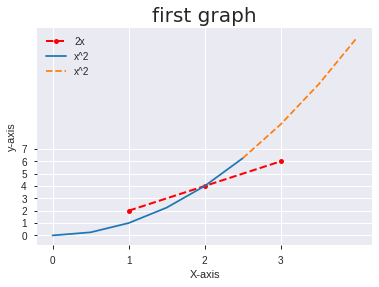

In [ ]:
x = [1,2,3]
y = [2,4,6]

# Resize
#plt.figure(figsize=(0.5,0.7), dpi=300)

# Line 1

plt.plot(x,y, label='2x', color = 'red',linewidth=2, marker='.', markersize = 10, markeredgecolor = 'blue', linestyle='--' )

# Line 2
#x2 = np.arange(0,4.5,0.5)
#plt.plot(x2,x2**2, label='x^2')

# Line 2
x2 = np.arange(0,4.5,0.5)
plt.plot(x2[:6],x2[:6]**2, label='x^2')
plt.plot(x2[5:],x2[5:]**2, label='x^2', linestyle='--')

plt.title('first graph', fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})
plt.xlabel('X-axis')
plt.ylabel('y-axis')

plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3,4,5,6,7])

plt.legend()
plt.show()

### bar chart

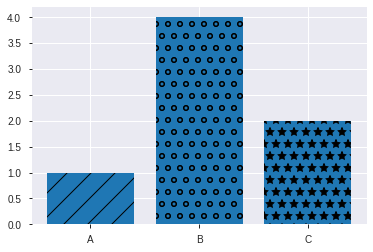

In [ ]:
labels = ['A','B','C']
values = [1,4,2]

bars = plt.bar(labels, values)

# patterns
patterns = ['/','o','*']
for bar in bars:
  bar.set_hatch(patterns.pop(0))

plt.show()

### histogram

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/amberkakkar01/Titanic-Survival-Prediction/master/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


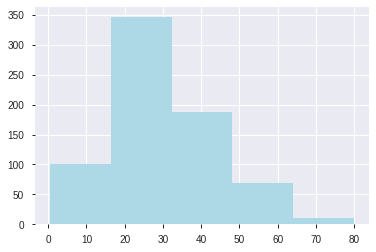

In [ ]:
a = plt.hist(titanic.Age, bins=5, color='lightblue')

### Pie chart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


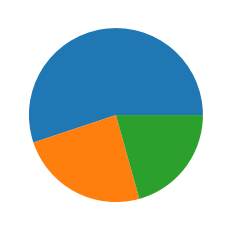

In [ ]:
l = [titanic.Pclass.value_counts()]

plt.pie(l)
plt.show()

In [ ]:
# https://www.youtube.com/watch?v=3Xc3CA655Y4

216
